In [2]:
import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 
URL = 'https://www.mohfw.gov.in/'
  
SHORT_HEADERS = ['SNo', 'State','Indian-Confirmed', 
                 'Foreign-Confirmed','Cured','Death'] 
  
response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 
  
stats = [] 
all_rows = soup.find_all('tr') 
  
for row in all_rows: 
    stat = extract_contents(row.find_all('td')) 
    if stat: 
        if len(stat) == 5: 
            # last row 
            stat = ['', *stat] 
            stats.append(stat) 
        elif len(stat) == 6: 
            stats.append(stat) 
  
stats[-1][1] = "Total Cases"
  
stats.remove(stats[-1]) 

In [4]:
objects = [] 
for row in stats : 
    objects.append(row[1])  
  
y_pos = np.arange(len(objects)) 
  
performance = [] 
for row in stats : 
    performance.append(int(row[2]) + int(row[3])) 
  
table = tabulate(stats, headers=SHORT_HEADERS) 
print(table) 

  SNo  State                          Indian-Confirmed    Foreign-Confirmed    Cured    Death
-----  ---------------------------  ------------------  -------------------  -------  -------
    1  Andaman and Nicobar Islands                   1                    0        0        0
    2  Andhra Pradesh                               12                    0        1        0
    3  Bihar                                         6                    0        0        1
    4  Chandigarh                                    7                    0        0        0
    5  Chhattisgarh                                  6                    0        0        0
    6  Delhi                                        35                    1        6        1
    7  Goa                                           3                    0        0        0
    8  Gujarat                                      42                    1        0        3
    9  Haryana                                      16      

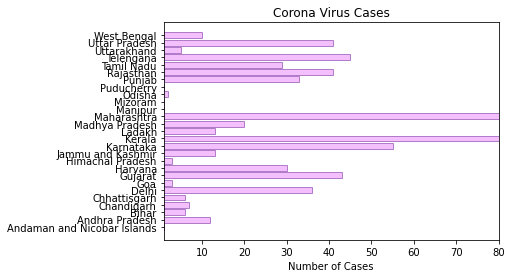

In [5]:
plt.barh(y_pos, performance, align='center', alpha=0.5, 
                 color=(234/256.0, 128/256.0, 252/256.0), 
                 edgecolor=(106/256.0, 27/256.0, 154/256.0)) 
  
plt.yticks(y_pos, objects) 
plt.xlim(1,80) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show() 


In [1]:
!pip install jovian

  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6501 sha256=fc93a5e05b9a31c31307f74127e2c9308b8950fd41c80a0c0ee9b150ed7b3e5b
  Stored in directory: c:\users\kumar\appdata\local\pip\cache\wheels\2a\ea\87\dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


In [2]:
import jovian

<IPython.core.display.Javascript object>

In [3]:
jovian.commit(project_name="Corona Virus Live Updates for India")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/kumarravifbfb/corona-virus-live-updates-for-india


'https://jovian.ai/kumarravifbfb/corona-virus-live-updates-for-india'